## Auto gen Example Tool Use

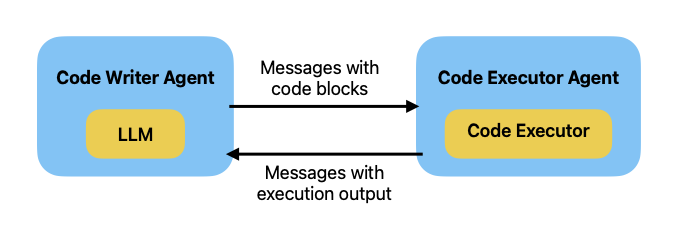

In [1]:
#use requirements_e7.txt to install the required packages

In [2]:
import os
import dotenv
from autogen import ConversableAgent
import openai

dotenv.load_dotenv("credentials.env")

True

Default config for autogen points to open ai format APIs. 
To use azure API's set config as below

In [3]:
aoai_endpoint = os.environ["AZURE_OPENAI_ENDPOINT"]
aoai_api_key = os.environ["AZURE_OPENAI_API_KEY"]
aoai_api_type = os.environ["OPENAI_API_TYPE"]
deployment_name = "gpt-4"
aoai_api_version = "2024-02-15-preview" #Using latest version as of this date. Older versions may not work with the code as syntax has changed drastically.

config_list = [
    {
        "model": deployment_name,  
        "base_url": aoai_endpoint, 
        "api_type": aoai_api_type, 
        "api_version": aoai_api_version, 
        "api_key": aoai_api_key,
        "temperature": 0.7
 }
]

In [4]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="NEVER",  # Always take human input for this agent for safety.
)

In [5]:
# The code writer agent's system message is to instruct the LLM on how to use
# the code executor in the code executor agent.
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_list},
    code_execution_config=False,  # Turn off code execution for this agent.
)

In [6]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Write Python code to calculate the 14th Fibonacci number.",
)

code_executor_agent (to code_writer_agent):

Write Python code to calculate the 14th Fibonacci number.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

```python
# Function to calculate the nth Fibonacci number
def fibonacci(n):
    a, b = 0, 1
    for _ in range(n-1):
        a, b = b, a + b
    return a

# Calculate the 14th Fibonacci number
fib_number = fibonacci(14)
print(f"The 14th Fibonacci number is: {fib_number}")
```

You can execute this Python code to calculate and print the 14th Fibonacci number.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: The 14th Fibonacci number is: 233


--------------------------------------------------------------------------------

>>>>>>>> USING AUTO RE

More complex example 

In [10]:
import datetime

today = datetime.datetime.now().strftime("%Y-%m-%d")
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}. Write Python code to plot TSLA's and META's "
    "stock price gains YTD, and save the plot to a file named 'stock_gains.png'.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-08-27. Write Python code to plot TSLA's and META's stock price gains YTD, and save the plot to a file named 'stock_gains.png'.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

To plot the year-to-date (YTD) gains of TSLA (Tesla, Inc.) and META (Meta Platforms, Inc., formerly Facebook) stocks, we'll use the `yfinance` library to retrieve the stock data, and `matplotlib` for plotting. If these libraries are not installed, they will need to be installed first.

I will provide you with a Python script to do the following:
1. Fetch the stock data for TSLA and META starting from the beginning of the year 2024 up to the current date using `yfinance`.
2. Calculate the gains by comparing the current closing price to the closing price at the beginning of the year.
3. Plot these gains on a graph using `matplotlib`.
4. Save the plot 

In [11]:
temp_dir.name

'C:\\Users\\NILESH~1\\AppData\\Local\\Temp\\tmpw7kk18wy'

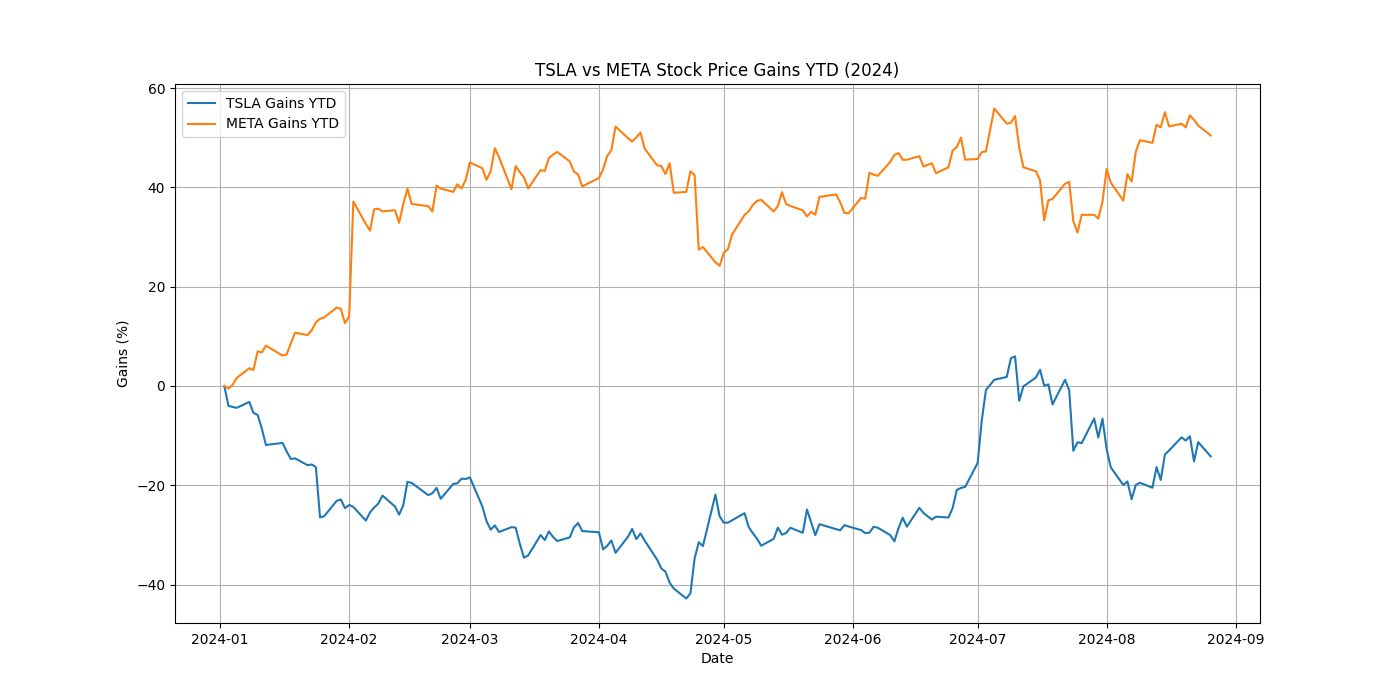

In [12]:
from IPython.display import Image

Image(os.path.join(temp_dir.name, "stock_gains.png"))

In [13]:
temp_dir.cleanup()